#  ACB GAMBLING - ANALISIS DE DATOS Y MODELO DE FORECASTING

In [1]:
import pandas as pd

In [159]:
import pandas as pd

with open(r'C:\Prueba_tecnica_INLAZE\assetment_bookmaker.csv', 'r', encoding='latin1') as file:
    lines = file.readlines()


cleaned_lines = [line.strip().strip('"') for line in lines]

_bookmaker.csv', 'w', encoding='latin1') as file:
    file.write('\n'.join(cleaned_lines))


df = pd.read_csv(r'\Prueba_tecnica_INLAZE\cleaned_assetment_bookmaker.csv', delimiter=',', encoding='latin1')
df

,"ï»¿""Periodo",# Clicks,# Registros IN,# Primer depÃÂ³sito IN,Total depositado IN,# Personas que apostaron IN,Total apostado,Net revenue IN
0,2022-08-04,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-03,NaN,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,NaN,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
442,2023-09-22,NaN,0.0,0.0,20.337191,1.0,60.688212,16.547864
443,2023-09-23,NaN,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
444,2023-09-23,NaN,0.0,0.0,0.000000,1.0,17.277301,6.835713
445,2023-09-24,NaN,2.0,8.0,9435.159241,891.0,62595.900804,1938.007500


In [160]:
df.columns

Index(['ï»¿"Periodo', '# Clicks', '# Registros IN', '# Primer depÃÂ³sito IN',
       'Total depositado IN', '# Personas que apostaron IN', 'Total apostado',
       'Net revenue IN'],
      dtype='object')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   periodo               446 non-null    datetime64[ns]
 1   clicks                446 non-null    float64       
 2   registrosIN           446 non-null    float64       
 3   primer_depositoIN     446 non-null    float64       
 4   total_depositadoIN    446 non-null    float64       
 5   personas_apostaronIN  446 non-null    float64       
 6   total_apostado        446 non-null    float64       
 7   net_revenueIN         446 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 31.4 KB


# Variables

* periodo = Fecha en formato yyyy-mm-dd
* clicks = Numero de clicks en la plataforma por usuarios
* registrosIN = Numero de registros de usuarios nuevos
* primer_depositoIN = Usuarios que realizaron su primer deposito
* total_depositadoIN= Total de depositos por usuarios
* personas_apostaronIN = cantidad de usuarios que apostaron el dia del registro
* total_apostado = total apostado por usuarios el dia del registro
* net_revenue = ganancias totales del casino el dia del registro

# CALIDAD DE DATOS

## 1. Renombramos las columnas para facilidad de manipulacion y visualizacion

In [161]:
import pandas as pd

def reemplazar_columnas(df, nuevas_columnas):  
    
    if len(nuevas_columnas) != len(df.columns):
        raise ValueError("Error")
    
    df.columns = nuevas_columnas
    return df


nuevas_columnas = ['periodo', 'clicks', 'registrosIN', 'primer_depositoIN', 'total_depositadoIN', 'personas_apostaronIN', 'total_apostado', 'net_revenueIN']
df = reemplazar_columnas(df, nuevas_columnas)
df

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
0,2022-08-04,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-03,NaN,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,NaN,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
442,2023-09-22,NaN,0.0,0.0,20.337191,1.0,60.688212,16.547864
443,2023-09-23,NaN,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
444,2023-09-23,NaN,0.0,0.0,0.000000,1.0,17.277301,6.835713
445,2023-09-24,NaN,2.0,8.0,9435.159241,891.0,62595.900804,1938.007500


## 2. Registros Duplicados y nulos

In [162]:
df[df.duplicated(keep=False)]

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
420,2023-09-11,1.0,0.0,0.0,NaN,NaN,NaN,NaN
421,2023-09-11,1.0,0.0,0.0,NaN,NaN,NaN,NaN


In [163]:
# Sum of all duplicated rows
duplicated_sum = df.duplicated().sum()

# Sum of all missing values
missing_values_sum = df.isnull().sum().sum()

print(f"Sum of duplicated rows: {duplicated_sum}")
print(f"Sum of missing values: {missing_values_sum}")

Sum of duplicated rows: 1
Sum of missing values: 396


In [164]:
df.isnull().sum()


periodo                   0
clicks                  178
registrosIN              23
primer_depositoIN        23
total_depositadoIN       43
personas_apostaronIN     43
total_apostado           43
net_revenueIN            43
dtype: int64

In [165]:
#transformamos la columna periodo a datetime

df['periodo'] = pd.to_datetime(df['periodo'], format= '%Y-%m-%d')

## Estadisticos descriptivos

In [166]:
df.drop(columns=['periodo']).describe().T

,count,mean,std,min,25%,50%,75%,max
clicks,269.0,1332.037175,2180.594419,1.000000,3.000000,283.000000,2222.000000,18707.000000
registrosIN,424.0,24.716981,100.916955,0.000000,0.000000,0.000000,4.000000,1324.000000
primer_depositoIN,424.0,13.926887,48.932934,0.000000,0.000000,1.000000,5.000000,659.000000
total_depositadoIN,404.0,4264.528107,4259.580876,0.000000,881.910946,2736.441715,7317.723531,23800.789951
personas_apostaronIN,404.0,277.868812,324.975136,1.000000,114.750000,178.000000,220.500000,1427.000000
total_apostado,404.0,33410.939323,41727.585071,1.206802,4434.178872,16856.000015,47524.790752,289945.271312
net_revenueIN,404.0,924.937067,3384.336651,-19141.062751,-4.609303,159.635620,1765.929862,25210.346664


## 3. Reemplazando valores Nulos y Duplicados

+ Contamos con un total 396 valores nulos en todo el dataset, para continuar con los posteriores analisis y creacion de modelos vamos a imputar los datos siguiendo las siguientes regla: Reemplazamos valores nulos por la mediana de de cada variable.

+ Solo existe un registro duplicado que sera eliminado ya que no afecta el analisis, ademas contiene valores nulos en varias variables.

In [167]:
#reemplazar nulos por la mediana

df.fillna(df.median(), inplace=True)

#elminanos duplicados
df.drop_duplicates(inplace=True)

df

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
0,2022-08-04,3.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
1,2022-08-08,1.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
2,2022-08-09,1.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
3,2022-11-03,283.0,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,283.0,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
442,2023-09-22,283.0,0.0,0.0,20.337191,1.0,60.688212,16.547864
443,2023-09-23,283.0,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
444,2023-09-23,283.0,0.0,0.0,0.000000,1.0,17.277301,6.835713
445,2023-09-24,283.0,2.0,8.0,9435.159241,891.0,62595.900804,1938.007500


In [168]:
suma_dup = df.duplicated().sum()
suma_nulos = df.isnull().sum().sum()

print(f"Registros duplicados: {suma_dup}")
print(f"Registros nulos: {suma_nulos}")

Registros duplicados: 0
Registros nulos: 0


## 4. Visualizacion Series de tiempo

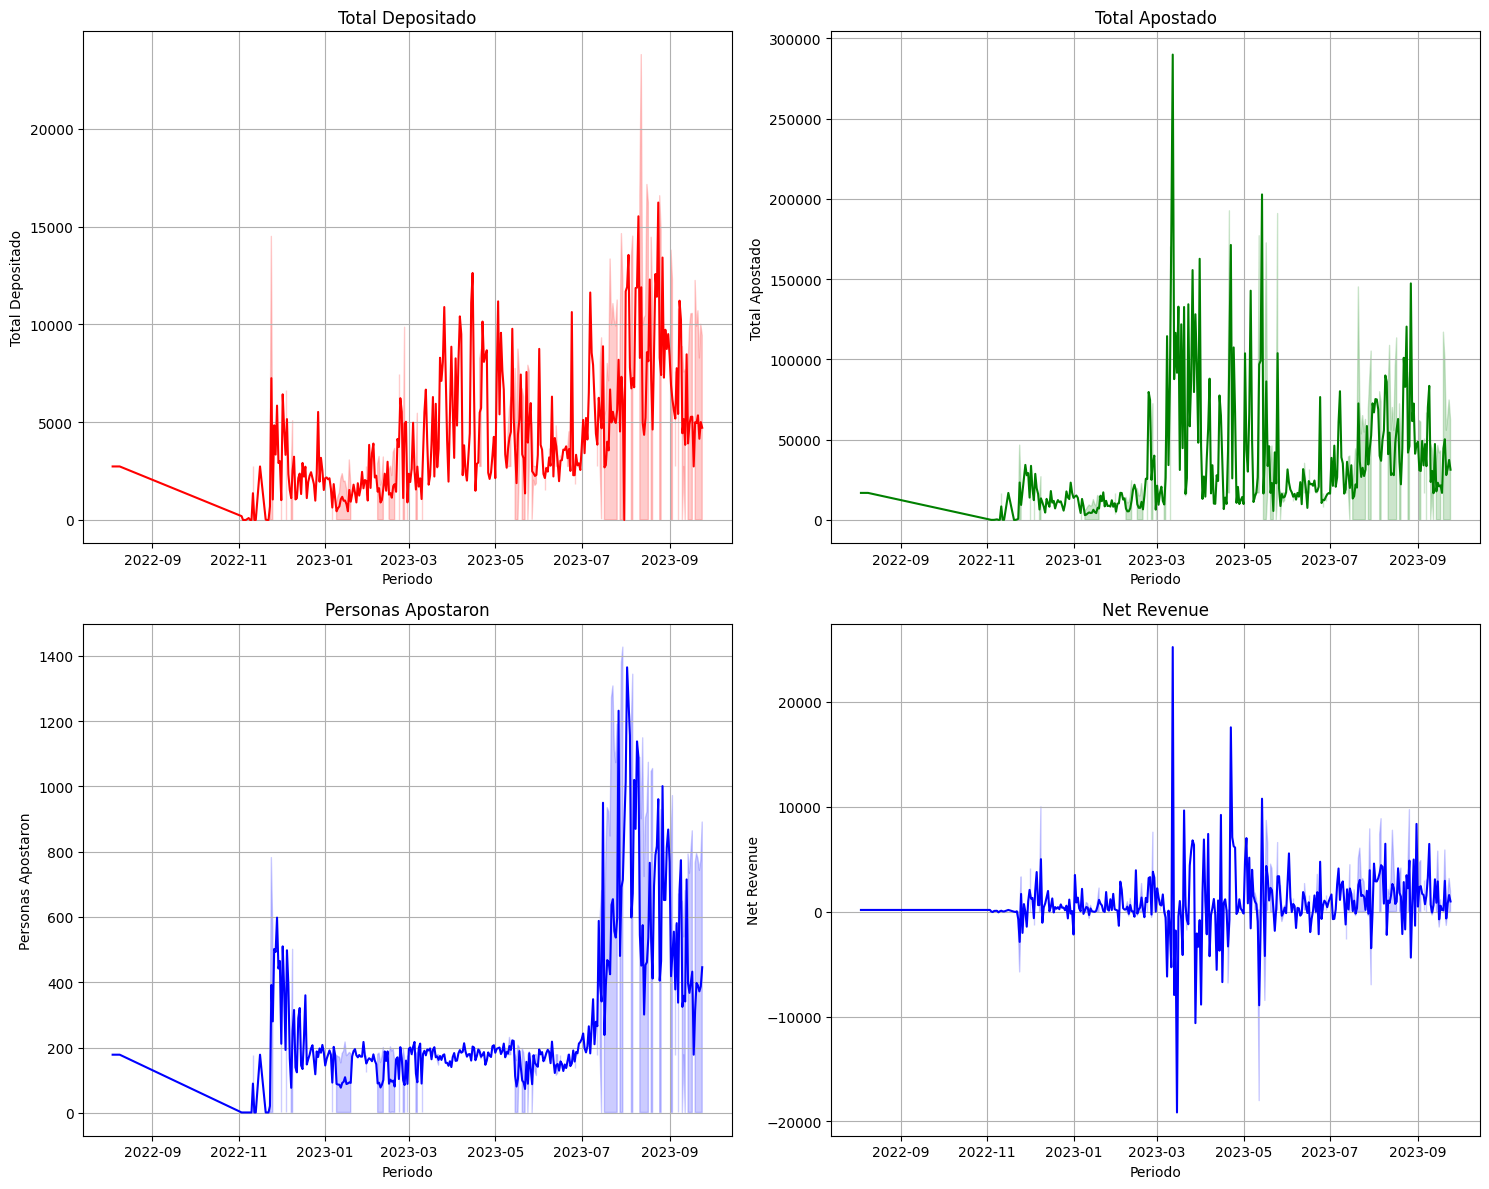

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot total_depositadoIN
sns.lineplot(x='periodo', y='total_depositadoIN', data=df, ax=axs[0, 0], c= 'r')
axs[0, 0].set_title('Total Depositado')
axs[0, 0].set_xlabel('Periodo')
axs[0, 0].set_ylabel('Total Depositado')
axs[0, 0].grid(True)

# Plot total_apostado
sns.lineplot(x='periodo', y='total_apostado', data=df, ax=axs[0, 1], c = 'g')
axs[0, 1].set_title('Total Apostado')
axs[0, 1].set_xlabel('Periodo')
axs[0, 1].set_ylabel('Total Apostado')
axs[0, 1].grid(True)

# Plot personas_apostaronIN
sns.lineplot(x='periodo', y='personas_apostaronIN', data=df, ax=axs[1, 0], c = 'b')
axs[1, 0].set_title('Personas Apostaron')
axs[1, 0].set_xlabel('Periodo')
axs[1, 0].set_ylabel('Personas Apostaron')
axs[1, 0].grid(True)

# Plot net_revenueIN
sns.lineplot(x='periodo', y='net_revenueIN', data=df, ax=axs[1, 1], c = 'b')
axs[1, 1].set_title('Net Revenue')
axs[1, 1].set_xlabel('Periodo')
axs[1, 1].set_ylabel('Net Revenue')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

El comportamiento de las variables en el tiempo es relativamente normal, a falta de informacion sobre el contexto podemos observar inicialmente como se relaciona la cantidad del total apostado y el numero de usuarios que apostaron en las mismas fechas. Adicionalmente, se destaca los maximos historicos de ganancias (revenue) en el mes de marzo de 2023 coincidiendo totalmente con los historicos de cantidades apostadas.

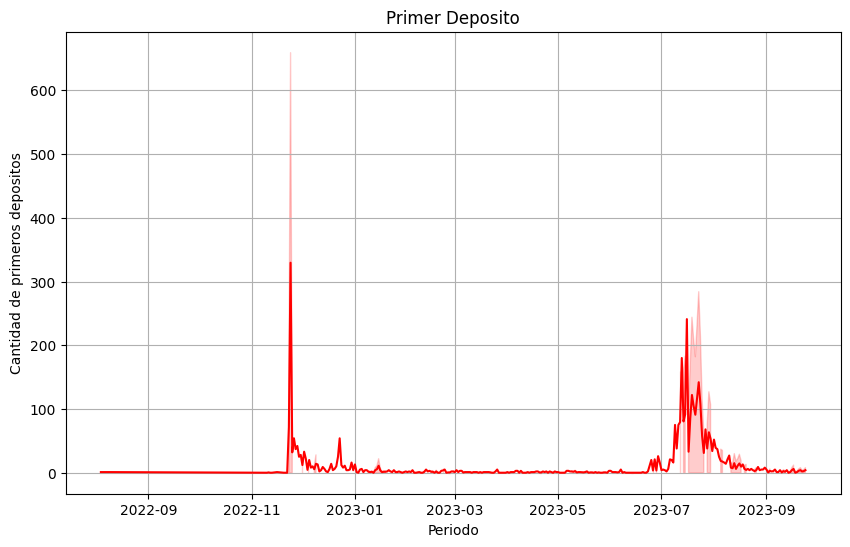

In [125]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='periodo', y='primer_depositoIN', data=df, c = 'r')
plt.title('Primer Deposito')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de primeros depositos')
plt.grid(True)

## 5. Correlacion entre variales

Se encuentra una relacion moderada entre las variables, se destaca la correlacion de las variables total depositado, personas que apostaron y total apostado con la variable Net revenue (variable objetivo)

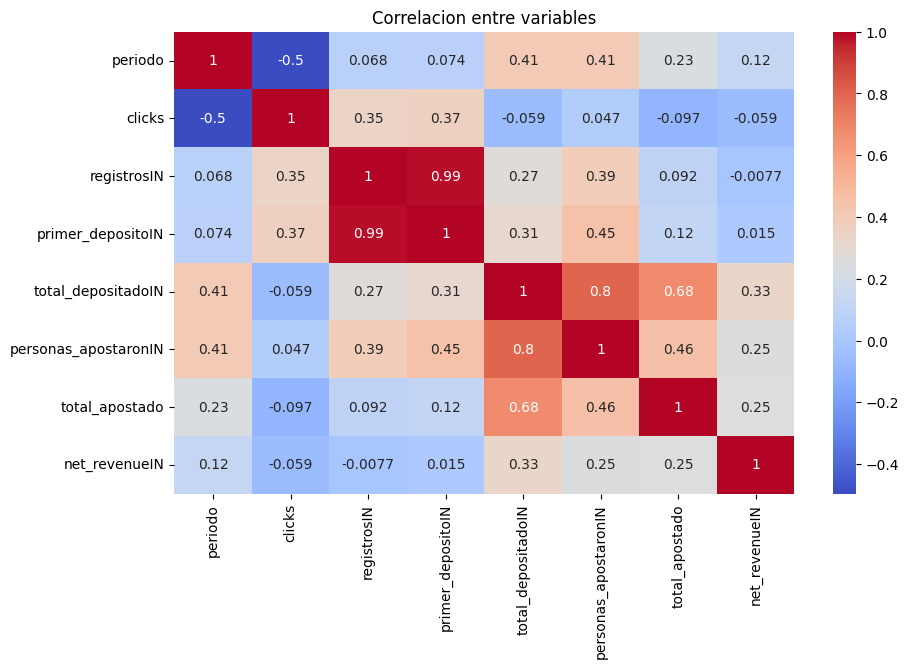

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlacion entre variables')
plt.show()

# Importamos archivo CSV para Visualizaciones en Power Bi

In [101]:
df.to_csv(r'..\assetment_bookmaker_powerbi.csv', index=False)

# Histograma de dataset

array([[<Axes: title={'center': 'periodo'}>,
        <Axes: title={'center': 'clicks'}>,
        <Axes: title={'center': 'registrosIN'}>],
       [<Axes: title={'center': 'primer_depositoIN'}>,
        <Axes: title={'center': 'total_depositadoIN'}>,
        <Axes: title={'center': 'personas_apostaronIN'}>],
       [<Axes: title={'center': 'total_apostado'}>,
        <Axes: title={'center': 'net_revenueIN'}>,
        <Axes: title={'center': 'mes'}>],
       [<Axes: title={'center': 'dia'}>, <Axes: title={'center': 'año'}>,
        <Axes: >]], dtype=object)

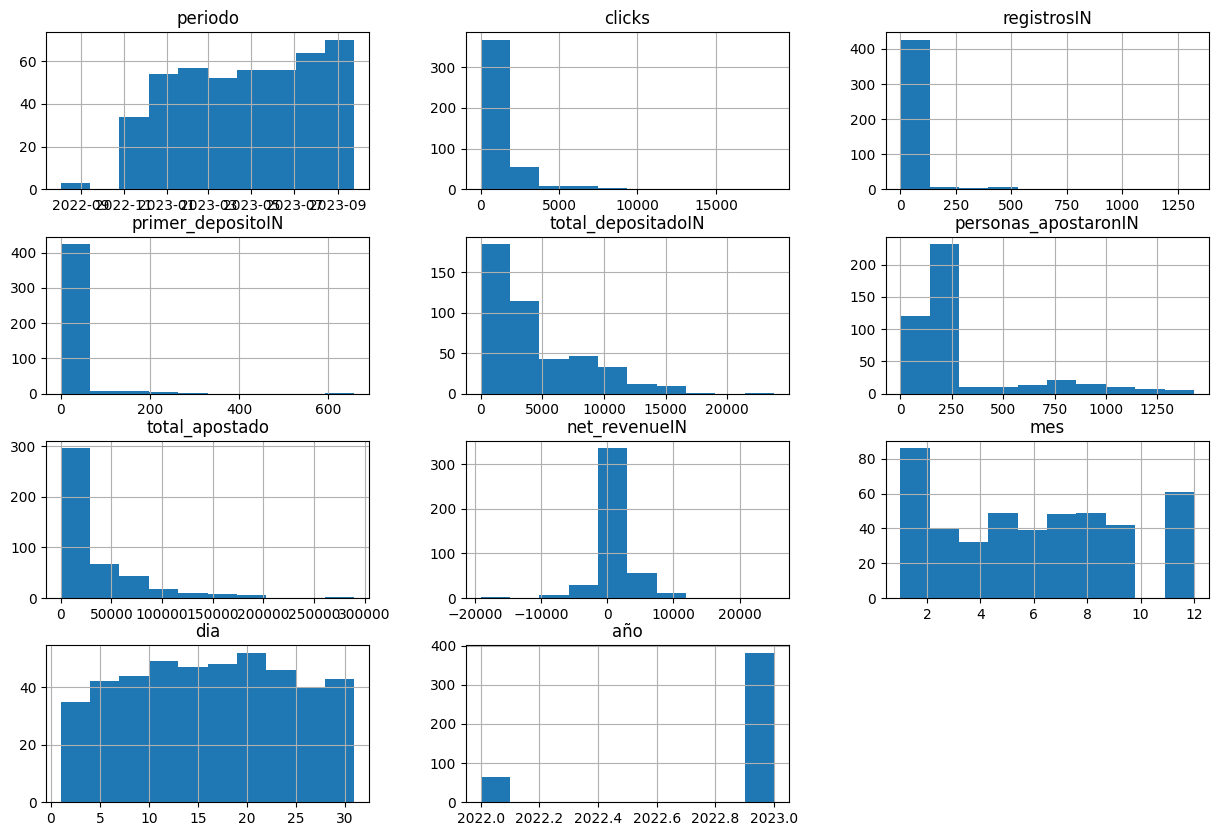

In [106]:
df.hist(figsize=(15, 10))

# Modelo de Proyeccion de ingresos Netos

## 6. Organizamos los datos en orden cronologico

In [171]:
df = df.sort_values('periodo')
df

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
0,2022-08-04,3.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
1,2022-08-08,1.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
2,2022-08-09,1.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
3,2022-11-03,283.0,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,283.0,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
442,2023-09-22,283.0,0.0,0.0,20.337191,1.0,60.688212,16.547864
443,2023-09-23,283.0,1.0,5.0,10010.929373,774.0,74746.940716,3160.019438
444,2023-09-23,283.0,0.0,0.0,0.000000,1.0,17.277301,6.835713
445,2023-09-24,283.0,2.0,8.0,9435.159241,891.0,62595.900804,1938.007500


## 7. Agrupamos por periodo para unificar registros de dias iguales

In [132]:
df_grouped = df.groupby('periodo').sum().reset_index()
df_grouped

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
0,2022-08-04,3.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
1,2022-08-08,1.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
2,2022-08-09,1.0,0.0,1.0,2736.441715,178.0,16856.000015,159.635620
3,2022-11-03,283.0,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,283.0,0.0,0.0,0.000000,1.0,44.174122,6.675201
...,...,...,...,...,...,...,...,...
318,2023-09-20,566.0,3.0,6.0,9911.344357,796.0,100563.615910,5869.985574
319,2023-09-21,566.0,2.0,8.0,10699.705738,780.0,55926.875468,-1301.300447
320,2023-09-22,566.0,1.0,4.0,8305.027509,744.0,63909.520706,1519.902491
321,2023-09-23,566.0,1.0,5.0,10010.929373,775.0,74764.218016,3166.855152


### 7. Eliminamos los primeros registros

Eliminamos los primeros registros ya que se encuentran muy alejados de los demas datos y dificulta el proceso de analisis. Ademas por la diferencia (3 meses) temporal realizar una imputacion no es conveniente.

In [133]:
df_grouped = df_grouped.drop(range(0, 3))
df_grouped

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
3,2022-11-03,283.0,0.0,0.0,194.524900,1.0,194.524900,160.483043
4,2022-11-04,283.0,0.0,0.0,0.000000,1.0,44.174122,6.675201
5,2022-11-05,283.0,0.0,0.0,0.000000,1.0,27.940599,-38.264751
6,2022-11-06,283.0,0.0,0.0,0.000000,1.0,66.087881,66.087881
7,2022-11-08,283.0,0.0,0.0,97.724580,1.0,368.705058,78.179664
...,...,...,...,...,...,...,...,...
318,2023-09-20,566.0,3.0,6.0,9911.344357,796.0,100563.615910,5869.985574
319,2023-09-21,566.0,2.0,8.0,10699.705738,780.0,55926.875468,-1301.300447
320,2023-09-22,566.0,1.0,4.0,8305.027509,744.0,63909.520706,1519.902491
321,2023-09-23,566.0,1.0,5.0,10010.929373,775.0,74764.218016,3166.855152


## 8. Graficamos nuevamente teniendo en cuenta la agrupacion

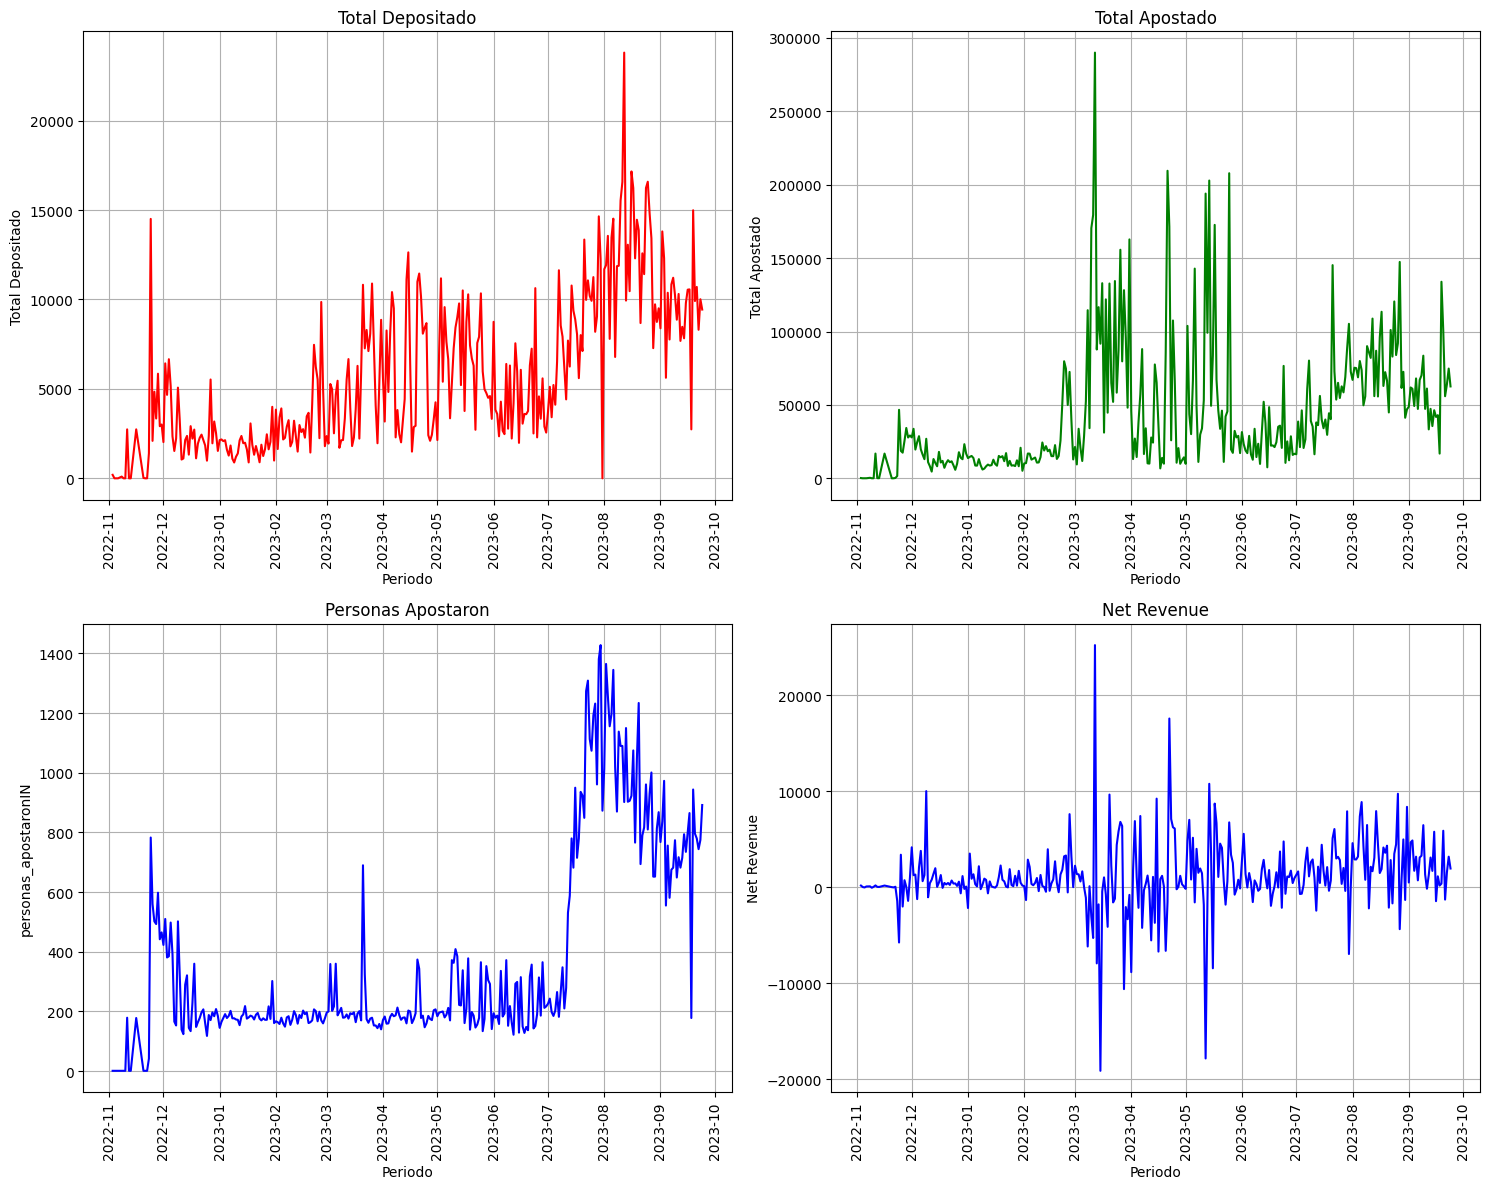

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))


sns.lineplot(x='periodo', y='total_depositadoIN', data=df_grouped, ax=axs[0, 0], c= 'r')
axs[0, 0].set_title('Total Depositado')
axs[0, 0].set_xlabel('Periodo')
axs[0, 0].set_ylabel('Total Depositado')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].grid(True)

sns.lineplot(x='periodo', y='total_apostado', data=df_grouped, ax=axs[0, 1], c = 'g')
axs[0, 1].set_title('Total Apostado')
axs[0, 1].set_xlabel('Periodo')
axs[0, 1].set_ylabel('Total Apostado')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].grid(True)


sns.lineplot(x='periodo', y='personas_apostaronIN', data=df_grouped, ax=axs[1, 0], c = 'b')
axs[1, 0].set_title('Personas Apostaron')
axs[1, 0].set_xlabel('Periodo')
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].grid(True)


sns.lineplot(x='periodo', y='net_revenueIN', data=df_grouped, ax=axs[1, 1], c = 'b')
axs[1, 1].set_title('Net Revenue')
axs[1, 1].set_xlabel('Periodo')
axs[1, 1].set_ylabel('Net Revenue')
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [134]:
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,periodo,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN
0,2022-11-03,283.0,0.0,0.0,194.524900,1.0,194.524900,160.483043
1,2022-11-04,283.0,0.0,0.0,0.000000,1.0,44.174122,6.675201
2,2022-11-05,283.0,0.0,0.0,0.000000,1.0,27.940599,-38.264751
3,2022-11-06,283.0,0.0,0.0,0.000000,1.0,66.087881,66.087881
4,2022-11-08,283.0,0.0,0.0,97.724580,1.0,368.705058,78.179664
...,...,...,...,...,...,...,...,...
315,2023-09-20,566.0,3.0,6.0,9911.344357,796.0,100563.615910,5869.985574
316,2023-09-21,566.0,2.0,8.0,10699.705738,780.0,55926.875468,-1301.300447
317,2023-09-22,566.0,1.0,4.0,8305.027509,744.0,63909.520706,1519.902491
318,2023-09-23,566.0,1.0,5.0,10010.929373,775.0,74764.218016,3166.855152


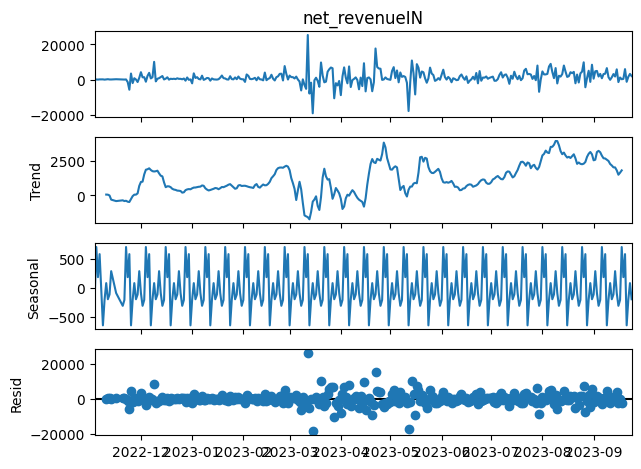

In [86]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_grouped.set_index('periodo', inplace=True)


result = seasonal_decompose(df_grouped['net_revenueIN'], model='additive', period=12)


result.plot()
plt.show()


# Modelo de FORECAST con Libreria Prophet

Tras analizar diversos metodos de pronostico se decidio utilizar prophet ya que es una libreria robusta que tiene metodos que facilitan el trabajo de la creacion del modelo. Ademas, teniendo en cuenta la poca cantidad de datos y falta de informacion contextual nos ofrece un pronostico decente en lineas generales para desde alli optimizar analizando patrones y tendencias en los datos.

In [174]:
df_grouped

,clicks,registrosIN,primer_depositoIN,total_depositadoIN,personas_apostaronIN,total_apostado,net_revenueIN,day,month,weekday
periodo,,,,,,,,,,
2022-11-03,283.0,0.0,0.0,194.524900,1.0,194.524900,160.483043,3,11,3
2022-11-04,283.0,0.0,0.0,0.000000,1.0,44.174122,6.675201,4,11,4
2022-11-05,283.0,0.0,0.0,0.000000,1.0,27.940599,-38.264751,5,11,5
2022-11-06,283.0,0.0,0.0,0.000000,1.0,66.087881,66.087881,6,11,6
2022-11-08,283.0,0.0,0.0,97.724580,1.0,368.705058,78.179664,8,11,1
...,...,...,...,...,...,...,...,...,...,...
2023-09-20,566.0,3.0,6.0,9911.344357,796.0,100563.615910,5869.985574,20,9,2
2023-09-21,566.0,2.0,8.0,10699.705738,780.0,55926.875468,-1301.300447,21,9,3
2023-09-22,566.0,1.0,4.0,8305.027509,744.0,63909.520706,1519.902491,22,9,4


### Preprocesamiento de los datos

In [237]:
# Preprocesamiento de los datos para le model de prophet
df_prophet = df_grouped[['net_revenueIN']].reset_index()
df_prophet.rename(columns={'periodo': 'ds', 'net_revenueIN': 'y'}, inplace=True)

print(df_prophet.head())


          ds           y
0 2022-11-03  160.483043
1 2022-11-04    6.675201
2 2022-11-05  -38.264751
3 2022-11-06   66.087881
4 2022-11-08   78.179664


### Train test split

In [238]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_prophet, test_size=0.15, shuffle=False)
print(train.shape, test.shape)


(272, 2) (48, 2)


### Importamos librerias e inicializamos modelo

In [239]:
from prophet import Prophet

model = Prophet(daily_seasonality=True, yearly_seasonality=True,  changepoint_prior_scale=0.05, seasonality_mode='multiplicative')
model.fit(train)


18:42:36 - cmdstanpy - INFO - Chain [1] start processing
18:42:36 - cmdstanpy - INFO - Chain [1] done processing


### Realizamos predicciones para los siguientes 730 dias (2 años)

In [240]:
future = model.make_future_dataframe(periods=730, freq='D')
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


             ds          yhat    yhat_lower    yhat_upper
997  2025-08-02  16799.410441  12128.731876  21560.313377
998  2025-08-03  15989.339192  11552.850385  20395.981912
999  2025-08-04  14766.011977  10416.345568  19606.194903
1000 2025-08-05  12256.801898   7687.195050  17079.447565
1001 2025-08-06   9340.025694   5086.693517  14286.714798


### Calculamos metricas de evaluacion del modelo

In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


test_forecast = forecast[forecast['ds'].isin(test['ds'])]
mae = mean_absolute_error(test['y'], test_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 2547.9532770494884
RMSE: 3119.2562566349966


### Graficamos los valores predichos y obtenemos dataframe con los pronosticos

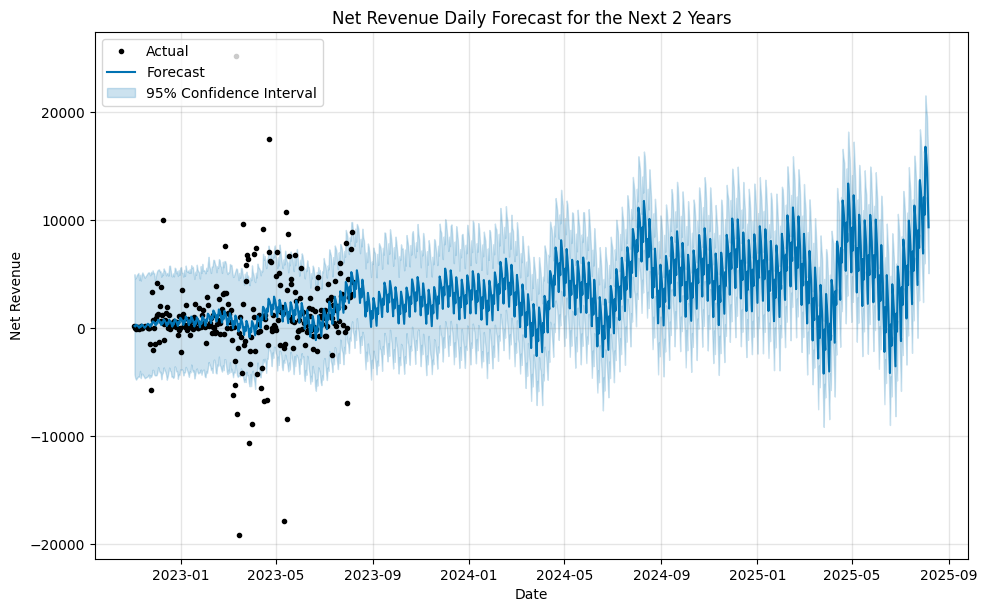

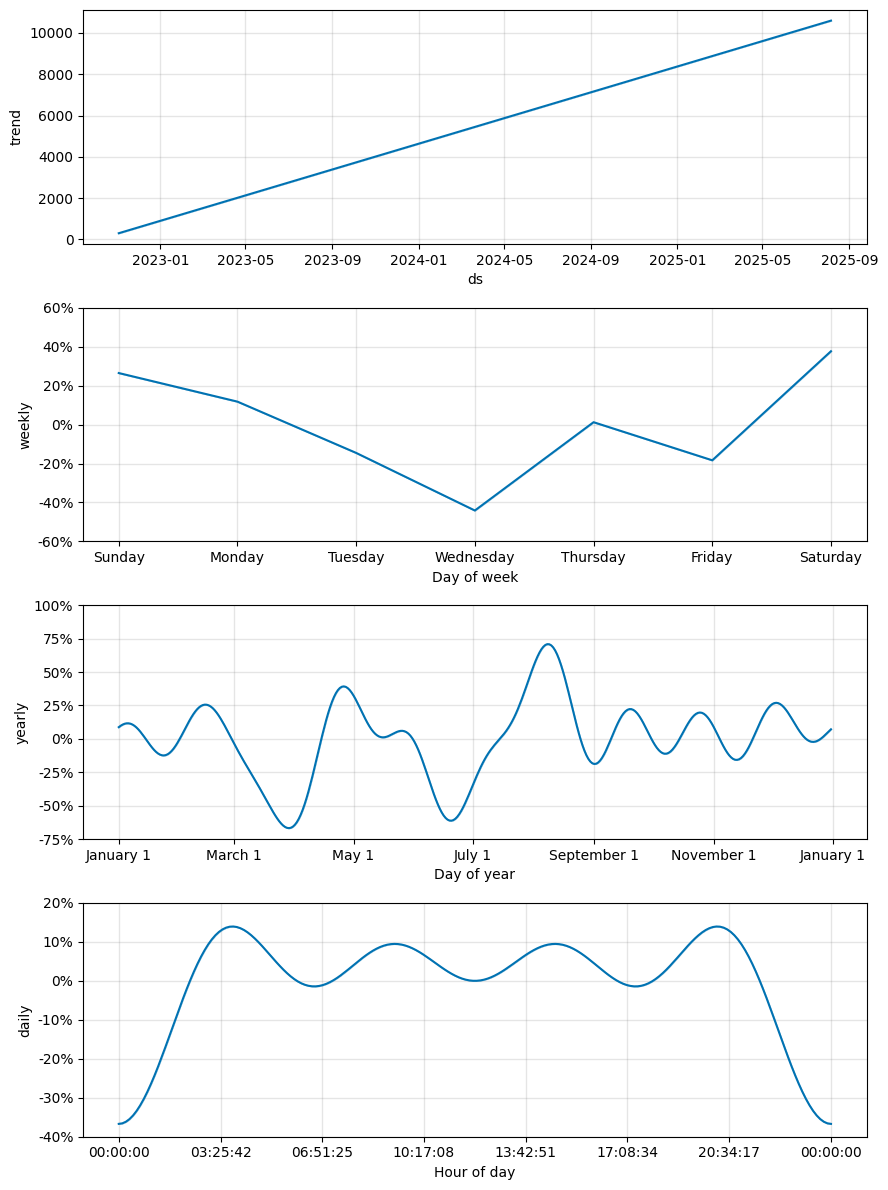

,ds,yhat,yhat_lower,yhat_upper
972,2025-07-08,3698.004781,-787.305419,8342.882751
973,2025-07-09,892.825722,-3378.256565,5362.063949
974,2025-07-10,5789.891667,854.826199,10706.894166
975,2025-07-11,3977.470576,-678.221460,8918.205881
976,2025-07-12,9958.085131,5306.442153,14919.440813
977,2025-07-13,8987.519664,4085.509596,13679.957453
978,2025-07-14,7649.125114,3404.420735,12589.989635
979,2025-07-15,5100.973574,367.146037,9779.470685
980,2025-07-16,2215.992372,-2293.945183,6803.684970
981,2025-07-17,7116.557602,2433.824840,11935.943258


In [242]:

fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.title('Net Revenue Daily Forecast for the Next 2 Years')


plt.legend(['Actual', 'Forecast', '95% Confidence Interval'], loc='upper left')

plt.show()

fig2 = model.plot_components(forecast)
plt.show()


result_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
result_df.tail(30)



# Conclusiones

La solucion propuesta a este problema de forecasting si bien es no es ideal, es un punto de partida interesante para realizar ajustes de hiperparametros, inclusion de factores externos como festivos, eventos deportivos que puedan contribuir a que el modelo se entrene con estos criterios y pueda ofrecer mejores resultados. A pesar de tener un error elevado el modelo se ajusta relativamente bien a las datos a pesar de solo contar con alrededor de 300 registros

Para mejorar la predicion idealmente se requiere tener los siguientes puntos

* Ajustar hiperparametros usando Randomized o Gridsearch
* Agregar fechas especiales como holidays o eventos deportivos
* Aplicar diversos metodos de validacion cruzada para series de tiempo

### Elaborado por Camilo Prada [GitHub]https://github.com/LiceoM